# Life Expectancy By Country

Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries. We will specifically look at how a country's economic success might impact the life expectancy in that area.

## Access the Data

To begin, let's get a sense of what this data looks like. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv(r"C:\Users\pinos\Desktop\country_data.csv")
data.head(10)

,Country,Life Expectancy,GDP
0,Afghanistan,58.19375,340.015425
1,Albania,75.15625,2119.726679
2,Algeria,73.61875,2847.853392
3,Angola,49.01875,1975.143045
4,Antigua and Barbuda,75.05625,9759.305728
5,Argentina,75.15625,6998.575103
6,Armenia,73.40000,1999.986318
7,Australia,81.81250,34637.565050
8,Austria,81.48125,33827.476310
9,Azerbaijan,70.73125,3302.947807


Let's isolate the column that contains the life expectancy.

In [21]:
life_expectancy=data['Life Expectancy']

## Finding the Quantiles

Now I am going to use NumPy functions on that column.

In [22]:
leq=np.quantile(life_expectancy, [0.25, 0.5, 0.75])
print(leq)

[62.325     72.525     75.4421875]


By looking at those three values I can get a sense of the spread of the data. For example, it seems like some of the data is fairly close together, a quarter of the data is between 72.5 years and 75.4 years.

(array([ 4.,  6., 14., 10., 10., 17., 11., 46., 13., 27.]),
 array([46.1125, 49.755 , 53.3975, 57.04  , 60.6825, 64.325 , 67.9675,
        71.61  , 75.2525, 78.895 , 82.5375]),
 <BarContainer object of 10 artists>)

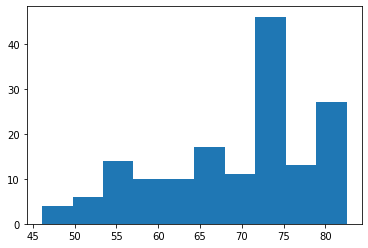

In [23]:
plt.hist(life_expectancy)

In [36]:
spain=data[data['Country']=='Spain']
print(spain)

    Country  Life Expectancy          GDP
133   Spain         82.06875  17093.45974


Spain falls into the 25% above 75 years life expectancy.

## Splitting the Data by GDP

GDP is a measure of a country's wealth. Let's now use the GDP data to see if life expectancy is affected by this value.

   I am going to split the data into two groups based on GDP. If I find the median GDP, I can create two datasets for "low GDP countries" and "high GDP countries".
   
   To start, let's isolate the GDP column and store it in a variable named 'gdp'. 

In [49]:
gdp=data['GDP']
gdp.head(10)

0      340.015425
1     2119.726679
2     2847.853392
3     1975.143045
4     9759.305728
5     6998.575103
6     1999.986318
7    34637.565050
8    33827.476310
9     3302.947807
Name: GDP, dtype: float64

Now I want to find the median GDP. I can use NumPy's np.median() function, but since the median is also a quantile, I can call np.quantile() using 0.5 as the second parameter.

In [50]:
median_gdp=np.median(gdp)
print(median_gdp)
median_gdp=np.quantile(gdp, 0.5)
print(median_gdp)

2938.0781155
2938.0781155


Let's now grab all of the rows from our original dataset that have a GDP less than or equal to the median. The following code will do that for me:

In [51]:
low_gdp=data[data['GDP'] <= median_gdp]
high_gdp=data[data['GDP'] >= median_gdp]
print(low_gdp.head())
print(high_gdp.head())

       Country  Life Expectancy          GDP
0  Afghanistan         58.19375   340.015425
1      Albania         75.15625  2119.726679
2      Algeria         73.61875  2847.853392
3       Angola         49.01875  1975.143045
6      Armenia         73.40000  1999.986318
               Country  Life Expectancy           GDP
4  Antigua and Barbuda         75.05625   9759.305728
5            Argentina         75.15625   6998.575103
7            Australia         81.81250  34637.565050
8              Austria         81.48125  33827.476310
9           Azerbaijan         70.73125   3302.947807


Now that we've split the data based on the GDP, let's see how the life expectancy of each group compares to each other.

In [52]:
low_gdp_quartiles=np.quantile(low_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print(low_gdp_quartiles)
high_gdp_quartiles=np.quantile(high_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print(high_gdp_quartiles)

[56.3375  64.34375 71.7375 ]
[72.965625 75.15625  80.521875]


## Histogram and Conclusions

By looking at the quantiles, I get a sense of the spread and central tendency of these two datasets. But let's plot a histogram of each dataset to really compare them.

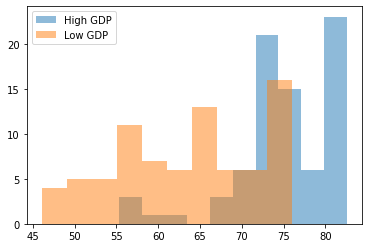

In [53]:
plt.hist(high_gdp["Life Expectancy"], alpha = 0.5, label = "High GDP")
plt.hist(low_gdp["Life Expectancy"], alpha = 0.5, label = "Low GDP")
plt.legend()
plt.show()

Based on the data, we can fairly say that there is an asociation between GDP and life expectancy. 70 years life expectancy is below the first quartile of the high GDP dataset, meanwhile in the low GDP, this same number falls in the third quarter of the data. 